# Cristallisation d’un produit actif pharmaceutique

On effectue une cristallisation d’un produit actif pharmaceutique dans un cristallisoir agité avec une vitesse relative entre les cristaux et la solution de 0,1 m/s. La vitesse de la cinétique d'intégration à la surface (réaction hétérogène) est d'ordre 2 et s'écrit :

$r=2.10^{-5}(c-c^*)^2\quad[kg/(m^2.s)]$

Le coefficient de transfert de matière autour des cristaux est déterminé à partir de la corrélation suivante :

$Sh=2+0.95Re^{0.5}Sc^{0.33}$ pour 2<Re<2000

On étudie la cristallisation pour les conditions opératoires suivantes de vitesse, u, de concentration en solution, c0, et du diamètre initial des cristaux, d0 :

		A -	u=0,1 m/s	c0=101 g/l	d0=0,5 mm
		
        B -	u=5 cm/s	c0=101 g/l	d0=0,5 mm
		
        C -	u=0,1 m/s	c0=110 g/l	d0=0,5 mm


>*Données:* 
>
> - *diffusion du produit actif dans le solvant : 1.10-9 m2/s*
>
> - *masse volumique du produit cristallisé : 2000 kg/m3*
>
> - *masse molaire du produit actif : 1000 g/mol*
>
> - *solvant :	viscosité : 10-3 Pl	et masse volumique 1000 kg/m3*
>
> - *concentration à l'équilibre (saturation)		100 g/l*

**1) Calculer pour ces conditions le facteur d'efficacité de la cristallisation et en déduire le taux de croissance des cristaux en kg/(m2.s).**


Sh= 6.76e+01
Da= 0.148
Efficiency= 0.782


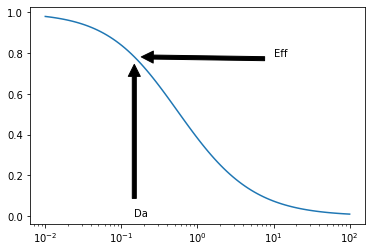

Taux de croissance ou flux de matière s integrant à l interface 1.56e-05 en kg/(m2.s)


In [58]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import newton
#DATA
#constant for the second order reaction
kr=2e-5
o_r=2
#hydro
u=0.1 #m/s
#solution
c0=101 #g/L
ceq=100 #g/L
ro=1000 #kg/m3
D=1.e-9 #m2/s
mu=0.001 #Pa s
#cristal
d0=5.e-4 #m

#COEFFICIENT DE MATIERE
#Reynolds
Re=ro*u*d0/mu
#Schmidt
Sc=mu/(ro*D)
#Sherwood
Sh=2+(0.95*Re**0.5*Sc**0.33)
print ('Sh=',"%.2e"%Sh)
k=Sh*D/d0
delta=D/k

#DAMKHOLER
Da=(kr*(c0-ceq)**(o_r-1))/k
print ('Da=', round(Da,3))

#EFFICIENCY
if o_r==1 :
    def ef(Da):
        eff=1/(1+Da)
        return eff
if o_r==2 :
    def ef(Da):
        eff=1/Da + 1/(2*Da**2)-np.sqrt(1+4*Da)/(2*Da**2)
        return eff
if o_r>2 :
    def ef(Da):
        def f(eff):
            return eff-(1-eff*Da)**o_r
        eff=newton(f,x0=0.5)
        return eff
    
print ('Efficiency=',round(ef(Da),3))    
x=np.logspace(-2,2,100)
plt.semilogx(x,ef(x))
plt.annotate('Eff', xy=(Da, ef(Da)), xytext=(10,ef(Da)),arrowprops=dict(facecolor='black', shrink=0.05),)
plt.annotate('Da', xy=(Da, ef(Da)), xytext=(Da, 0),arrowprops=dict(facecolor='black', shrink=0.05),)
plt.show()

#taux de croissance
N=ef(Da)*kr*(c0-ceq)**o_r
print ('Taux de croissance ou flux de matière s integrant à l interface', "%.2e"%N, 'en kg/(m2.s)')



2) Estimer d'après ces résultats, le temps nécessaire à une augmentation de 10% du diamètre des cristaux. Vous effectuerez un bilan matière sur un cristal en négligeant l'effet de l'augmentation du diamètre sur le taux de croissance des cristaux.


3) Commenter l'effet des conditions opératoires sur la croissance des cristaux :
		a)	vitesse relative solution/cristaux
		b)	concentration de sursaturation